In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("üå´üõ∏")

üå´üõ∏


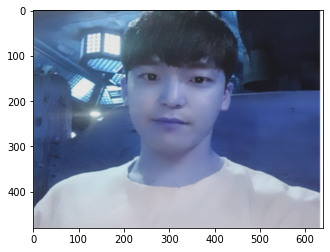

In [2]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú
img_bgr = cv2.resize(img_bgr, (640, 480))    # 640x360Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
plt.imshow(img_bgr)
plt.show()

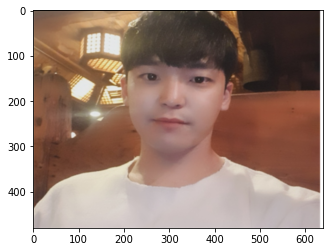

In [3]:
# plt.imshow Ïù¥Ï†ÑÏóê RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î∞îÍæ∏Îäî Í≤ÉÏùÑ ÏûäÏßÄÎßàÏÑ∏Ïöî. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector ÏÑ†Ïñ∏
print("üå´üõ∏")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("üå´üõ∏")

üå´üõ∏
üå´üõ∏


rectangles[[(191, 93) (414, 316)]]


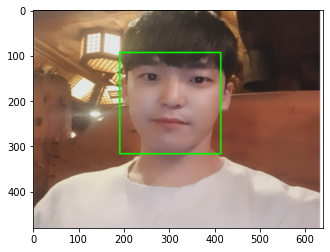

In [5]:
print(dlib_rects)   # Ï∞æÏùÄ ÏñºÍµ¥ÏòÅÏó≠ Ï¢åÌëú

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [6]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


In [7]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


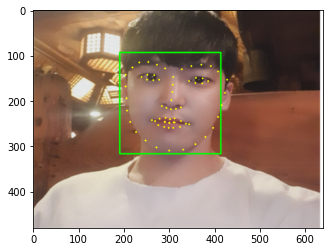

In [8]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(305, 198)
(x,y) : (305,86)
(w,h) : (224,224)


In [10]:
# Ïù¥ÎØ∏ÏßÄÏóê Ï†ÅÏö©ÏãúÌÇ¨ Ïä§Ìã∞Ïª§ Ï¢åÌëú ÌôïÏù∏ÌïòÍ∏∞

# Ïù¥ÎØ∏ÏßÄÏóê Ï†ÅÏö©ÏãúÌÇ¨ Ïä§Ìã∞Ïª§Ïùò Ï¢åÌëúÎ•º Ï∞æÎäî Ìï®Ïàò
def sticker_position(dlib_rects, list_landmarks):    # dlib_rects = bounding box Ï¢åÌëú, list_landmarks = Ïù¥Î™©Íµ¨ÎπÑ ÏúÑÏπò 
    
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
        # x = landmark[30][0]    # ÏôïÍ¥Ä Ïä§Ìã∞Ïª§Î•º Î∂ôÌûê xÏ¢åÌëú
        # y = landmark[30][1] - dlib_rect.width()//2    # ÏôïÍ¥Ä Ïä§Ìã∞Ïª§Î•º Î∂ôÌûê yÏ¢åÌëú

        x = landmark[30][0]    # Í≥†ÏñëÏù¥ Ïä§Ìã∞Ïª§Ïùò Ï§ëÏã¨ xÏ¢åÌëú
        y = landmark[30][1]    # Í≥†ÏñëÏù¥ Ïä§Ìã∞Ïª§Ïùò Ï§ëÏã¨ yÏ¢åÌëú

        # w = dlib_rect.width()    # bounding boxÏùò ÎÑàÎπÑ
        # h = dlib_rect.height()    # bouding boxÏùò ÎÜíÏù¥
        
        w = (landmark[30][0] - landmark[2][0]) * 2    # Í≥†ÏñëÏù¥ Ïä§Ìã∞Ïª§Ïùò ÎÑàÎπÑ
        h = (landmark[48][1] - landmark[30][1]) * 2    # Í≥†ÏñëÏù¥ Ïä§Ìã∞Ïª§Ïùò ÎÜíÏù¥
    
    return x, y, w, h

x, y, w, h = sticker_position(dlib_rects, list_landmarks)    # Ïù¥ÎØ∏ÏßÄÏóê Ï†ÅÏö©ÏãúÌÇ¨ Ïä§Ìã∞Ïª§Ïùò Ï¢åÌëúÎ•º Ï∞æÎäî Ìï®Ïàò Î∂àÎü¨Ïò§Í∏∞
print ('Image center (x,y) : (%d,%d)'%(x,y))
print ('Image size (w,h) : (%d,%d)'%(w,h))

Image center (x,y) : (305,198)
Image size (w,h) : (198,88)


top-left (x,y) : (206,154)


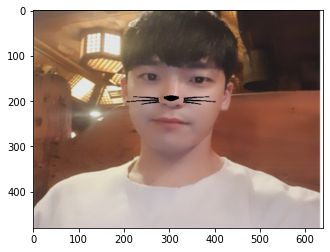

In [13]:
# Í≥†ÏñëÏù¥ Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú Ï†ÅÏö©ÌïòÍ∏∞

# ÏÇ¨ÏßÑ ÏÜç ÏñºÍµ¥Ïóê Í≥†ÏñëÏù¥ ÏàòÏóºÏùÑ Î∂ôÌûàÎäî Ìï®Ïàò
def attach_sticker(x, y, w, h, img_bgr, sticker):    # x, y, w, h = Í≥†ÏñëÏù¥ ÏàòÏóº Ïä§Ìã∞Ïª§Ïùò ÏúÑÏπòÏôÄ ÌÅ¨Í∏∞, img_bgr = Í≥†ÏñëÏù¥ ÏàòÏóºÏùÑ Î∂ôÌûê Ïù¥ÎØ∏ÏßÄ, sticker = Í≥†ÏñëÏù¥ ÏàòÏóº Ïä§Ìã∞Ïª§Ïùò ÌååÏùºÏùò Ïù¥Î¶Ñ 
    sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'    # Í≥†ÏñëÏù¥ ÏàòÏóº Ïä§Ìã∞Ïª§Í∞Ä Ï†ÄÏû•Îêú ÏúÑÏπò
    img_sticker = cv2.imread(sticker_path)    # openCVÎ°ú Í≥†ÏñëÏù¥ Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ ÏùΩÍ∏∞
    img_sticker = cv2.resize(img_sticker, (w,h))    # Í≥†ÏñëÏù¥ Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ resize ÌïòÍ∏∞

    # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Ï∂îÍ∞ÄÌïòÍ∏∞ ÏúÑÌï¥ÏÑú x, y Ï¢åÌëúÎ•º Ï°∞Ï†ïÌï©ÎãàÎã§. Ïù¥ÎØ∏ÏßÄ ÏãúÏûëÏ†êÏùÄ top-left Ï¢åÌëú ÏûÖÎãàÎã§.
    refined_x = x - w // 2    # left
    refined_y = y - h // 2    # top
    print ('top-left (x,y) : (%d,%d)'%(refined_x, refined_y))
    
    # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÏùò yÏ∂ïÏù¥ ÏùåÏàòÏù∏ Í≤ΩÏö∞ (Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏúÑÏ™ΩÏùÑ Î≤óÏñ¥ÎÇú Í≤ΩÏö∞)
    if (refined_y < 0):
        img_sticker = img_sticker[-refined_y:]    # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏùò Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇú Ïä§Ìã∞Ïª§ Î∂ÄÎ∂ÑÏùÑ Ï†úÍ±∞ÌïòÍ∏∞
        refined_y = 0    # top Ïùò y Ï¢åÌëúÍ∞íÏùÑ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏùò Í≤ΩÍ≥Ñ Í∞íÏúºÎ°ú ÏàòÏ†ïÌïòÍ∏∞
       
    # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÏùò yÏ∂ïÏù¥ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏùò ÏµúÎåÄ yÏ∂ïÎ≥¥Îã§ ÌÅ∞ Í≤ΩÏö∞ (Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏïÑÎûòÏ™ΩÏùÑ Î≤óÏñ¥ÎÇú Í≤ΩÏö∞)
    if ((refined_y + h) > img_bgr.shape[0]):
        img_sticker = img_sticker[:img_bgr.shape[0]-refined_y]    # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏùò Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇú Ïä§Ìã∞Ïª§ Î∂ÄÎ∂ÑÏùÑ Ï†úÍ±∞ÌïòÍ∏∞
   
    # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÏùò xÏ∂ïÏù¥ ÏùåÏàòÏù∏ Í≤ΩÏö∞ (Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏôºÏ™ΩÏùÑ Î≤óÏñ¥ÎÇú Í≤ΩÏö∞)
    if (refined_x < 0): 
        img_sticker = img_sticker[:, -refined_x:, :]    # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏùò Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇú Ïä§Ìã∞Ïª§ Î∂ÄÎ∂ÑÏùÑ Ï†úÍ±∞ÌïòÍ∏∞
        refined_x = 0    # left Ïùò x Ï¢åÌëúÍ∞íÏùÑ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏùò Í≤ΩÍ≥Ñ Í∞íÏúºÎ°ú ÏàòÏ†ïÌïòÍ∏∞
    
    # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÏùò xÏ∂ïÏù¥ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏùò ÏµúÎåÄ xÏ∂ïÎ≥¥Îã§ ÌÅ∞ Í≤ΩÏö∞ (Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÍ∞Ä Ïò§Î•∏Ï™ΩÏùÑ Î≤óÏñ¥ÎÇú Í≤ΩÏö∞)
    if ((refined_x + w) > img_bgr.shape[1]):
        img_sticker = img_sticker[:, :img_bgr.shape[1]-refined_x, :]     # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏùò Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇú Ïä§Ìã∞Ïª§ Î∂ÄÎ∂ÑÏùÑ Ï†úÍ±∞ÌïòÍ∏∞
    
    # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞
    sticker_area = img_bgr[refined_y:refined_y+h, refined_x:refined_x+w]    # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Ïä§Ìã∞Ïª§Î•º Ï†ÅÏö©ÏãúÌÇ¨ Î∂ÄÎ∂Ñ
    img_bgr[refined_y:refined_y+h, refined_x:refined_x+w] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÏÉâÏù¥ 255Ïù∏ Î∂ÄÎ∂Ñ(ÌïòÏñÄÏÉâ)ÏùÄ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÏÉâ(sticker_area)ÏùÑ Ïπ†ÌïòÍ≥†,
    # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÏÉâÏù¥ 255Í∞Ä ÏïÑÎãå Î∂ÄÎ∂Ñ(ÌïòÏñÄÏÉâÏù¥Ïô∏Ïùò Î™®Îì†ÏÉâ)ÏùÄ Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÏÉâ(img_sticker)ÏùÑ Ïπ†ÌïúÎã§.
    # (255,255,255) == ÌïòÏñÄÏÉâ

attach_sticker(x, y, w, h, img_bgr, "cat-whiskers.png")    # ÏÇ¨ÏßÑ ÏÜç ÏñºÍµ¥Ïóê Í≥†ÏñëÏù¥ ÏàòÏóºÏùÑ Î∂ôÌûàÎäî Ìï®Ïàò Î∂àÎü¨Ïò§Í∏∞
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))    # maplotlib Î°ú Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ Ïù¥ÎØ∏ÏßÄ Ï±ÑÎÑêÏùÑ RGB ÏàúÏúºÎ°ú Î∞îÍæ∏Í≥†, matplotlibÎ°ú Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•ÌïòÍ∏∞
plt.show()    # ÌôîÎ©¥Ïóê Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•ÌïòÍ∏∞